                             OLS Regression Results                            
Dep. Variable:     Stock Closing Price   R-squared:                       0.581
Model:                             OLS   Adj. R-squared:                  0.579
Method:                  Least Squares   F-statistic:                     346.0
Date:                 Wed, 26 Feb 2025   Prob (F-statistic):           4.56e-49
Time:                         17:34:01   Log-Likelihood:                -755.92
No. Observations:                  252   AIC:                             1516.
Df Residuals:                      250   BIC:                             1523.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            100.0836      0.9

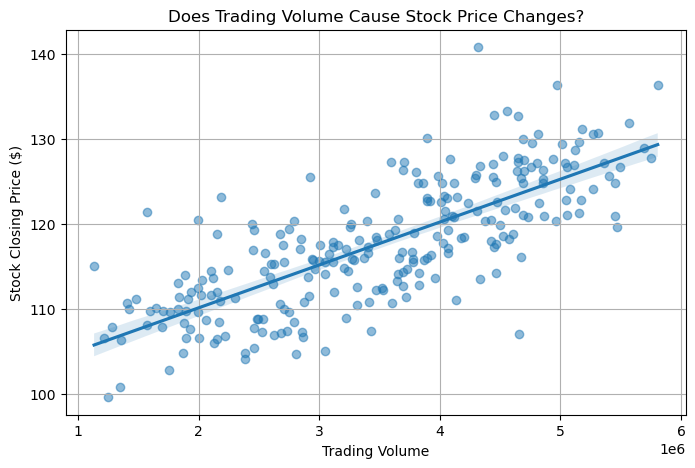

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Step 1: Generate Synthetic Stock Market Data
np.random.seed(42)
days = 252  # Number of trading days (1 year)

# Simulate trading volume (random but increasing trend)
trading_volume = np.random.randint(1000000, 5000000, days) + np.linspace(0, 1000000, days)

# Simulate stock price (influenced by trading volume)
stock_price = 100 + 0.000005 * trading_volume + np.random.normal(0, 5, days)  # Base price + volume influence + noise

# Create a DataFrame
stock_data = pd.DataFrame({
    "Trading Volume": trading_volume,
    "Stock Closing Price": stock_price
})

# 📌 Step 2: Perform Regression Analysis
X = sm.add_constant(stock_data["Trading Volume"])  # Add intercept
y = stock_data["Stock Closing Price"]

# Fit the regression model
model = sm.OLS(y, X).fit()

# 📌 Step 3: Print Regression Summary
print(model.summary())

# 📌 Step 4: Visualize the Relationship
plt.figure(figsize=(8, 5))
sns.regplot(x=stock_data["Trading Volume"], y=stock_data["Stock Closing Price"], scatter_kws={"alpha": 0.5})
plt.xlabel("Trading Volume")
plt.ylabel("Stock Closing Price ($)")
plt.title("Does Trading Volume Cause Stock Price Changes?")
plt.grid(True)
plt.show()